In [123]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [54]:
secrets_file = open("secrets.txt","r")

In [55]:
string = secrets_file.read()

In [56]:
string.split('\n')

['cid:7f1ce368e29f4f96b7945f7a54f1c168',
 'csecret:4eaacaf660c747769b3fbb8ab73f07cc']

In [57]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [58]:
secrets_dict

{'cid': '7f1ce368e29f4f96b7945f7a54f1c168',
 'csecret': '4eaacaf660c747769b3fbb8ab73f07cc'}

In [124]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [60]:
# results = sp.search(q='Lady Gaga', limit=50) # like entering something in the search box of spotify
#results

## Getting the playlist

In [61]:
playlist = sp.user_playlist_tracks("spotify", "0BUNSGihi2mrhQu3fPcVim")

In [10]:
playlist

{'href': 'https://api.spotify.com/v1/playlists/0BUNSGihi2mrhQu3fPcVim/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2013-05-28T17:17:03Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/darkspy72'},
    'href': 'https://api.spotify.com/v1/users/darkspy72',
    'id': 'darkspy72',
    'type': 'user',
    'uri': 'spotify:user:darkspy72'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0czJqnJDu3vWrLHmsbLunu'},
       'href': 'https://api.spotify.com/v1/artists/0czJqnJDu3vWrLHmsbLunu',
       'id': '0czJqnJDu3vWrLHmsbLunu',
       'name': 'The Muppets',
       'type': 'artist',
       'uri': 'spotify:artist:0czJqnJDu3vWrLHmsbLunu'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',

In [11]:
len(playlist["items"])

100

In [12]:
playlist['next']

'https://api.spotify.com/v1/playlists/0BUNSGihi2mrhQu3fPcVim/tracks?offset=100&limit=100&additional_types=track'

In [13]:
from random import randint
from time import sleep
# 1) This gets all tracks from the playlist
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [14]:
all_tracks = get_playlist_tracks("0BUNSGihi2mrhQu3fPcVim")
len(all_tracks)

813

In [35]:
all_tracks

[{'added_at': '2013-05-28T17:17:03Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/darkspy72'},
   'href': 'https://api.spotify.com/v1/users/darkspy72',
   'id': 'darkspy72',
   'type': 'user',
   'uri': 'spotify:user:darkspy72'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0czJqnJDu3vWrLHmsbLunu'},
      'href': 'https://api.spotify.com/v1/artists/0czJqnJDu3vWrLHmsbLunu',
      'id': '0czJqnJDu3vWrLHmsbLunu',
      'name': 'The Muppets',
      'type': 'artist',
      'uri': 'spotify:artist:0czJqnJDu3vWrLHmsbLunu'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
   

## URI's

In [ ]:
''' What we need:
 1) Get Playlist [x] file : playlist
 2) Get all songs from the playlist  [x]  file: all_tracks
 2) Get artist name from each song of the playlist[x] file: all_artist
 3) Get all albums from each of the artists
 4) Get all songs from each of the albums
 5) Get URI's for all the songs
 6) Create Dataframe'''

In [15]:
def all_artists(all_tracks):
    artist = [all_tracks[i]['track']['artists'][0]['name'] for i in range(len(all_tracks))]
    return artist
all_artists = all_artists(all_tracks)

In [19]:
df_all_artists = pd.DataFrame(all_artists, columns=['artist'])
df_all_artists.shape

(813, 1)

## Get songs from all artists

In [39]:
def all_track_names(all_tracks):
    names = [all_tracks[i]['track']['name'] for i in range(len(all_tracks))]      #tracks
    return names
all_track_names = all_track_names(all_tracks)
df_all_track_names = pd.DataFrame(all_track_names, columns=['name'])          #tracks data frame
df_all_track_names.shape

(813, 1)

In [51]:
def uris(all_tracks):
    uris = [all_tracks[i]['track']['uri'] for i in range(len(all_tracks))]
    return uris
all_uris = uris(all_tracks)
df_all_uris = pd.DataFrame(all_uris, columns=['uris'])

In [45]:
songs = pd.concat([df_all_track_names, df_all_artists, df_all_uris], axis=1 )

In [62]:
features = [sp.audio_features(i) for i in (all_uris)]

In [63]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]


features_new = flatten(features)
features_new[0]


{'danceability': 0.526,
 'energy': 0.413,
 'key': 9,
 'loudness': -7.674,
 'mode': 1,
 'speechiness': 0.0278,
 'acousticness': 0.428,
 'instrumentalness': 0,
 'liveness': 0.126,
 'valence': 0.211,
 'tempo': 115.936,
 'type': 'audio_features',
 'id': '1SJ4ycWow4yz6z4oFz8NAG',
 'uri': 'spotify:track:1SJ4ycWow4yz6z4oFz8NAG',
 'track_href': 'https://api.spotify.com/v1/tracks/1SJ4ycWow4yz6z4oFz8NAG',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SJ4ycWow4yz6z4oFz8NAG',
 'duration_ms': 188933,
 'time_signature': 3}

In [65]:
danceability = [features_new[i]['danceability'] for i in range(len(features_new))]
energy = [features_new[i]['energy'] for i in range(len(features_new))]
key = [features_new[i]['key'] for i in range(len(features_new))]
loudness = [features_new[i]['loudness'] for i in range(len(features_new))]
mode = [features_new[i]['mode'] for i in range(len(features_new))]
speechiness = [features_new[i]['speechiness'] for i in range(len(features_new))]
acousticness = [features_new[i]['acousticness'] for i in range(len(features_new))]
instrumentalness = [features_new[i]['instrumentalness'] for i in range(len(features_new))]
liveness = [features_new[i]['liveness'] for i in range(len(features_new))]
valence = [features_new[i]['valence'] for i in range(len(features_new))]
tempo = [features_new[i]['tempo'] for i in range(len(features_new))]

In [72]:
# Create a Dataframe from all features
df_all_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 
                                         'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 
                                         'acousticness':acousticness, 'instrumentalness':instrumentalness, 
                                         'liveness':liveness, 'valence':valence, 'tempo':tempo})


In [73]:
df_all_features

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.526   0.413    9    -7.674     1       0.0278       0.42800   
1           0.663   0.168    0   -13.725     1       0.0448       0.92800   
2           0.422   0.878    5    -4.863     1       0.0442       0.00935   
3           0.821   0.676    3    -6.366     0       0.0547       0.18700   
4           0.388   0.327    5   -12.522     1       0.0317       0.73200   
..            ...     ...  ...       ...   ...          ...           ...   
808         0.796   0.798    1    -6.312     1       0.0317       0.03400   
809         0.635   0.516    3    -8.677     1       0.0341       0.12500   
810         0.569   0.367    5    -5.178     1       0.0878       0.86200   
811         0.732   0.764   10    -6.503     0       0.0631       0.16200   
812         0.308   0.376    4   -15.240     1       0.0626       0.11600   

     instrumentalness  liveness  valence    tempo  
0            0.000000    0.1260    0.211  115.936  
1            0.000057    0.3610    0.678   85.005  
2            0.332000    0.2010    0.496   84.044  
3            0.000100    0.0927    0.559  119.012  
4            0.001030    0.1500    0.222  107.894  
..                ...       ...      ...      ...  
808          0.000042    0.0952    0.942  116.032  
809          0.000000    0.1200    0.127  114.074  
810          0.000155    0.3370    0.823  169.768  
811          0.346000    0.3220    0.685  132.019  
812          0.000003    0.1660    0.158  186.047  

[813 rows x 11 columns]

In [111]:
all_tracks_1 = pd.concat([df_all_track_names, df_all_artists, df_all_uris, df_all_features], axis=1 )

In [112]:
all_tracks_1

name  \
0                                   Rainbow Connection   
1    Somewhere Over The Rainbow_What A Wonderful World   
2                               What a Wonderful World   
3    One Day / Reckoning Song (Wankelmut Remix) [Ra...   
4              What A Wonderful World - Single Version   
..                                                 ...   
808                            Cold Heart - PNAU Remix   
809                             Everything That I Want   
810                                       The Loophole   
811  Major Tom (Coming Home) - Adam K & Soha Radio ...   
812                 The Wreck of the Edmund Fitzgerald   

                      artist                                  uris  \
0                The Muppets  spotify:track:1SJ4ycWow4yz6z4oFz8NAG   
1      Israel Kamakawiwo'ole  spotify:track:25U7raB3ZSszayTYClh4hF   
2                Joey Ramone  spotify:track:04cdEVbQPb8BJb7593e5fO   
3    Asaf Avidan & the Mojos  spotify:track:5HSkycOEtb9iQ7cg1Oyqmu   
4            Louis Armstrong  spotify:track:2pp3RfqX5cb1BAnmNi4Nej   
..                       ...                                   ...   
808               Elton John  spotify:track:6zSpb8dQRaw0M1dK8PBwQz   
809                     MAVV  spotify:track:1A2rlbdSXZWyPXkEm3AXK5   
810      Garfunkel and Oates  spotify:track:6B89ADIwxCw60PHZN6Kdp4   
811           Shiny Toy Guns  spotify:track:7nXXIXFSyDDPlfzCW9bdAa   
812         Gordon Lightfoot  spotify:track:536L9C0N7vhYdibCJx3cI2   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.526   0.413    9    -7.674     1       0.0278       0.42800   
1           0.663   0.168    0   -13.725     1       0.0448       0.92800   
2           0.422   0.878    5    -4.863     1       0.0442       0.00935   
3           0.821   0.676    3    -6.366     0       0.0547       0.18700   
4           0.388   0.327    5   -12.522     1       0.0317       0.73200   
..            ...     ...  ...       ...   ...          ...           ...   
808         0.796   0.798    1    -6.312     1       0.0317       0.03400   
809         0.635   0.516    3    -8.677     1       0.0341       0.12500   
810         0.569   0.367    5    -5.178     1       0.0878       0.86200   
811         0.732   0.764   10    -6.503     0       0.0631       0.16200   
812         0.308   0.376    4   -15.240     1       0.0626       0.11600   

     instrumentalness  liveness  valence    tempo  
0            0.000000    0.1260    0.211  115.936  
1            0.000057    0.3610    0.678   85.005  
2            0.332000    0.2010    0.496   84.044  
3            0.000100    0.0927    0.559  119.012  
4            0.001030    0.1500    0.222  107.894  
..                ...       ...      ...      ...  
808          0.000042    0.0952    0.942  116.032  
809          0.000000    0.1200    0.127  114.074  
810          0.000155    0.3370    0.823  169.768  
811          0.346000    0.3220    0.685  132.019  
812          0.000003    0.1660    0.158  186.047  

[813 rows x 14 columns]

## Clustering

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [150]:
# Model building for Clustering. Creating scaler
x_transformer = StandardScaler().fit(df_all_features)

In [151]:
x_prep = x_transformer.transform(df_all_features)

In [97]:
x_prep

array([[-0.14448912, -0.95226344,  1.1193953 , ..., -0.39596108,
        -1.17030975, -0.2607122 ],
       [ 0.73637736, -2.0075736 , -1.44658697, ...,  1.05831626,
         0.71252602, -1.30986901],
       [-0.81317608,  1.05067216, -0.02104126, ...,  0.06816999,
        -0.0212558 , -1.34246542],
       ...,
       [ 0.13198722, -1.15040331, -0.02104126, ...,  0.90979432,
         1.29713242,  1.56522972],
       [ 1.18002544,  0.55962989,  1.40450444, ...,  0.8169681 ,
         0.7407484 ,  0.28481136],
       [-1.54615987, -1.11163681, -0.30615041, ..., -0.14842451,
        -1.38399347,  2.11740145]])

In [98]:
# Now, all features will have the same weight.
# scaler = pd.DataFrame(x_scaled,columns=df_all_features.columns)

In [83]:
print(scaler.shape)

(813, 11)


In [174]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(x_prep)

KMeans(n_clusters=3, random_state=1234)

In [121]:
kmeans.inertia_

3576.3385595146574

In [175]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(x_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    486
1    286
2     41
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

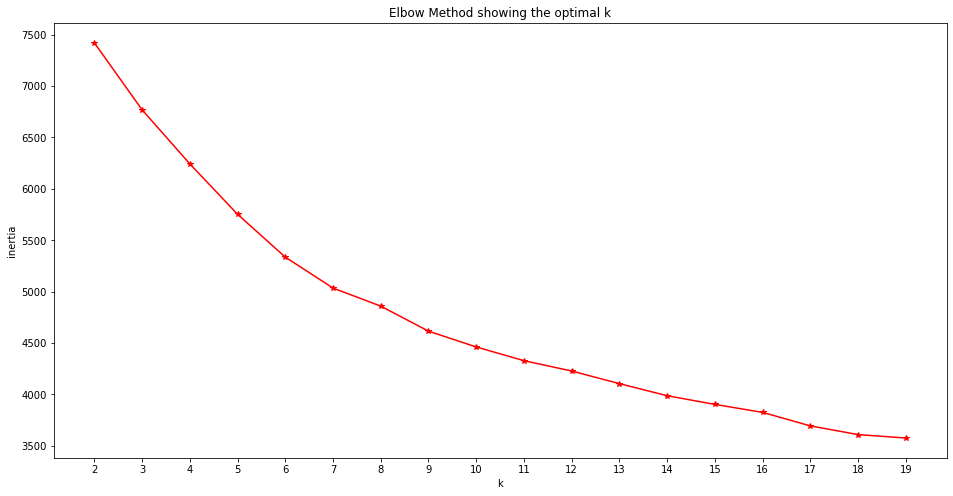

In [103]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'r*-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


In [104]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(x_prep)
clusters = kmeans.predict(x_prep)
pd.Series(clusters).value_counts().sort_index()


0    184
1    184
2    299
3    105
4     41
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

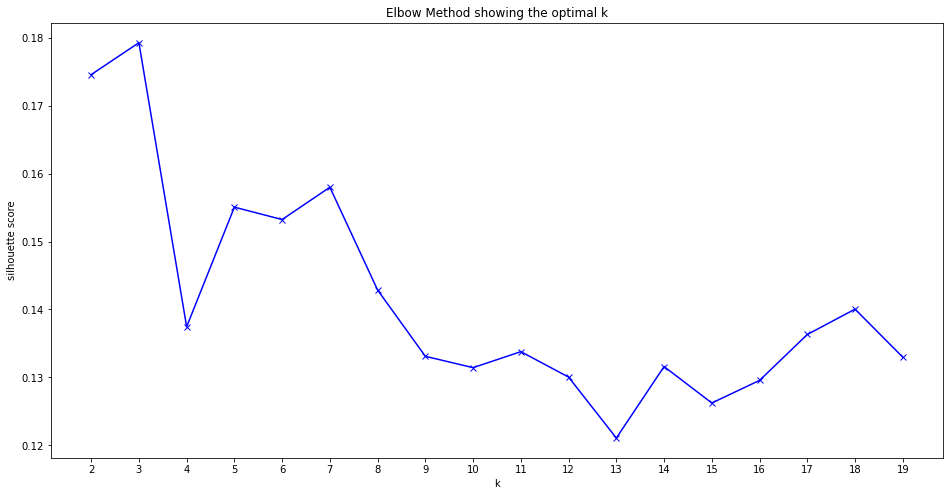

In [105]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x_prep)
    silhouette.append(silhouette_score(x_prep, kmeans.predict(x_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-') # the "bx-" means: blue line with an x at each point
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')
plt.show

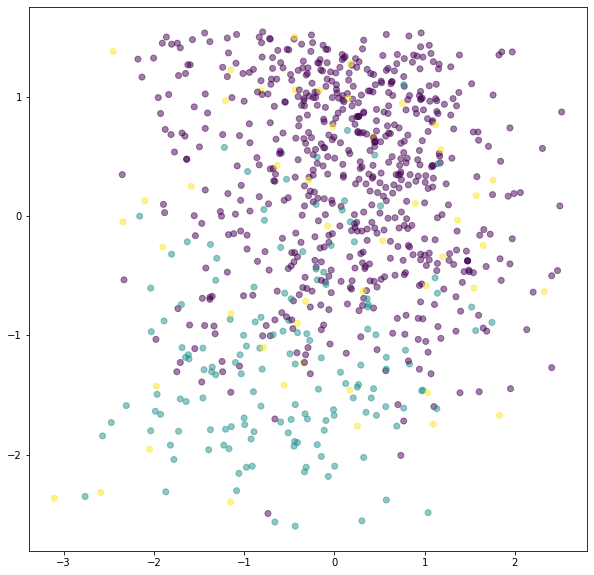

In [106]:
from sklearn import cluster, datasets
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(x_prep)
plt.figure(figsize=(10, 10))
plt.scatter(x_prep[:, 0], x_prep[:, 1], c=pred,alpha=0.5)
plt.show()


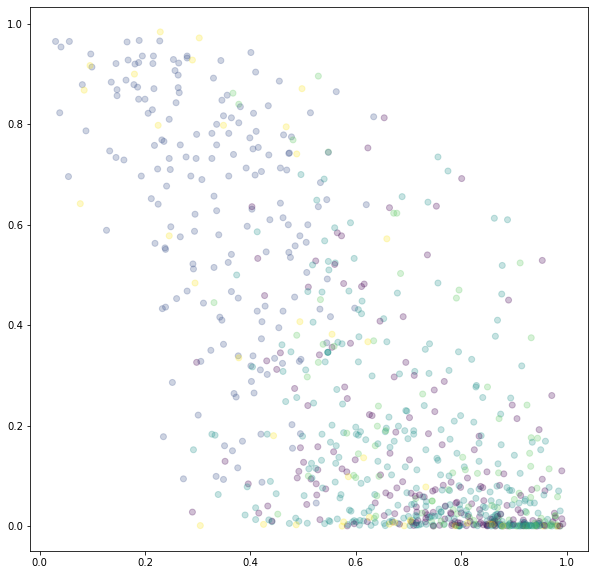

In [107]:
plt.figure(figsize=(10, 10))
plt.scatter(all_featuresdf['energy'], all_featuresdf['acousticness'], c=clusters,alpha=0.25)
plt.show()


In [176]:
kmeans

KMeans(n_clusters=3, random_state=1234)

In [177]:
all_tracks_final

name  \
0                                   Rainbow Connection   
1    Somewhere Over The Rainbow_What A Wonderful World   
2                               What a Wonderful World   
3    One Day / Reckoning Song (Wankelmut Remix) [Ra...   
4              What A Wonderful World - Single Version   
..                                                 ...   
808                            Cold Heart - PNAU Remix   
809                             Everything That I Want   
810                                       The Loophole   
811  Major Tom (Coming Home) - Adam K & Soha Radio ...   
812                 The Wreck of the Edmund Fitzgerald   

                      artist                                  uris  \
0                The Muppets  spotify:track:1SJ4ycWow4yz6z4oFz8NAG   
1      Israel Kamakawiwo'ole  spotify:track:25U7raB3ZSszayTYClh4hF   
2                Joey Ramone  spotify:track:04cdEVbQPb8BJb7593e5fO   
3    Asaf Avidan & the Mojos  spotify:track:5HSkycOEtb9iQ7cg1Oyqmu   
4            Louis Armstrong  spotify:track:2pp3RfqX5cb1BAnmNi4Nej   
..                       ...                                   ...   
808               Elton John  spotify:track:6zSpb8dQRaw0M1dK8PBwQz   
809                     MAVV  spotify:track:1A2rlbdSXZWyPXkEm3AXK5   
810      Garfunkel and Oates  spotify:track:6B89ADIwxCw60PHZN6Kdp4   
811           Shiny Toy Guns  spotify:track:7nXXIXFSyDDPlfzCW9bdAa   
812         Gordon Lightfoot  spotify:track:536L9C0N7vhYdibCJx3cI2   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.526   0.413    9    -7.674     1       0.0278       0.42800   
1           0.663   0.168    0   -13.725     1       0.0448       0.92800   
2           0.422   0.878    5    -4.863     1       0.0442       0.00935   
3           0.821   0.676    3    -6.366     0       0.0547       0.18700   
4           0.388   0.327    5   -12.522     1       0.0317       0.73200   
..            ...     ...  ...       ...   ...          ...           ...   
808         0.796   0.798    1    -6.312     1       0.0317       0.03400   
809         0.635   0.516    3    -8.677     1       0.0341       0.12500   
810         0.569   0.367    5    -5.178     1       0.0878       0.86200   
811         0.732   0.764   10    -6.503     0       0.0631       0.16200   
812         0.308   0.376    4   -15.240     1       0.0626       0.11600   

     instrumentalness  liveness  valence    tempo  0  
0            0.000000    0.1260    0.211  115.936  1  
1            0.000057    0.3610    0.678   85.005  1  
2            0.332000    0.2010    0.496   84.044  2  
3            0.000100    0.0927    0.559  119.012  0  
4            0.001030    0.1500    0.222  107.894  1  
..                ...       ...      ...      ... ..  
808          0.000042    0.0952    0.942  116.032  2  
809          0.000000    0.1200    0.127  114.074  2  
810          0.000155    0.3370    0.823  169.768  3  
811          0.346000    0.3220    0.685  132.019  0  
812          0.000003    0.1660    0.158  186.047  1  

[813 rows x 15 columns]

In [178]:
all_tracks_final = pd.concat([all_tracks_1, pd.Series(clusters)], axis=1 )

In [179]:
all_tracks_final[0].unique()

array([1, 0, 2])

In [180]:
all_tracks_final.to_csv('all_tracks_final')

## Song Recommender

In [116]:
songs = pd.read_csv('all_tracks_final')

In [117]:
top100 = pd.read_csv('Top100_songs.csv')

In [118]:
song_choice = input('Please enter a song name: ')
if top100.song.isin([song_choice]).any:
    yoursong = top100.sample(n=1)
    print('We recommend: ' + yoursong['song'].values[0] + ' by ' +  yoursong['artist'].values[0])
else:
    # use the user input conduct a search on spotify (sp.search)
    # Use the first entry of the spotify search
    # get the features (uri) from this song
    # 
    # assign this somehow to a cluster previously created and select one
    # (?) Create dataframe from song features?
    
    # Perform transformer
    # # kmeans.predict(features_df) to find cluster the song should go to
    # provides cluster number
    # get random song of the same cluster # from the large dataframe
    # printing..
    # 

Please enter a song name: Easy On Me
We recommend: Baby Lekker Ding by Jeffrey Heesen


In [164]:
song_choice = input('Please enter a song name: ')
if top100.song.isin([song_choice]).any:
    yoursong = top100.sample(n=1)
    print('We recommend: ' + yoursong['song'].values[0] + ' by ' +  yoursong['artist'].values[0])
else:
    results = sp.search(song_choice, type = 'track', limit=1)
    song_uri = results['tracks']['items'][0]['uri']
    features = sp.audio_features(song_uri) # this should be a dictionary
    features_df = pd.DataFrame(features)
    features_df = features_df.select_dtypes(np.number)
    features_df = features_df.drop(['duration_ms', 'time_signature'], axis=1)
    x_new = x_transformer.transform(features_df)
    #cluster_new = kmeans.predict(x_new)
    #df_cluster_new = cluster_new[cluster_df['cluster']

KeyboardInterrupt: Interrupted by user

In [162]:
results['tracks']['items'][0]['uri']

'spotify:track:0gplL1WMoJ6iYaPgMCL0gX'

In [165]:
song_choice = 'Easy On Me'
results = sp.search(song_choice, type = 'track', limit=1)
song_uri =song_uri = results['tracks']['items'][0]['uri']
features = sp.audio_features(song_uri) # this should be a dictionary
features_df = pd.DataFrame(features)
features_df = features_df.select_dtypes(np.number)
features_df = features_df.drop(['duration_ms', 'time_signature'], axis=1)
x_new = x_transformer.transform(features_df)
cluster_new = kmeans.predict(x_new)# this is an array
song_rec

In [166]:
cluster_new

array([7])

In [144]:
features_df = features_df.select_dtypes(np.number)

In [147]:
features_df = features_df.drop(['duration_ms', 'time_signature'], axis=1)

In [148]:
features_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.604   0.366    5    -7.519     1       0.0282         0.578   

   instrumentalness  liveness  valence    tempo  
0                 0     0.133     0.13  141.981

In [ ]:
# transform like I did before clustering
# 
# kmeans.predict(features_df) to find cluster the song should go to

In [133]:
results['tracks']['items'][0]['uri']

'spotify:track:0gplL1WMoJ6iYaPgMCL0gX'

In [139]:
features[0].values()

dict_values([0.604, 0.366, 5, -7.519, 1, 0.0282, 0.578, 0, 0.133, 0.13, 141.981, 'audio_features', '0gplL1WMoJ6iYaPgMCL0gX', 'spotify:track:0gplL1WMoJ6iYaPgMCL0gX', 'https://api.spotify.com/v1/tracks/0gplL1WMoJ6iYaPgMCL0gX', 'https://api.spotify.com/v1/audio-analysis/0gplL1WMoJ6iYaPgMCL0gX', 224695, 4])

In [ ]:
# uris = [all_tracks[i]['track']['uri']

In [ ]:
# pickle.dump(LRmodel, open('model.p', 'wb'))
# original_LR_model = pickle.load(open('model.p','rb'))
